In [18]:
import pysam

bam_file = pysam.AlignmentFile('/Users/apple/Documents/cfDNA/simulator/IH03_0.05.bam', 'rb')
bed_file = open('/Users/apple/Documents/projects/Mr. Mottaghi/input/beds/bloodvessel_v2.bed', 'r')
output_file = open('/Users/apple/Documents/projects/Mr. Mottaghi/input/bloodvessel_healthy_frag.txt', 'w')

bed_regions = []

# Read the BED file and store the regions in a list
for line in bed_file:
    fields = line.strip().split(',')
    chrom = fields[0]
    start = int(fields[1])
    end = int(fields[2])
    bed_regions.append((chrom, start, end))

# Loop through the BAM file and count the number of fragments that overlap each region
for region in bed_regions:
    count = 0
    total_length = 0
    for read in bam_file.fetch(region[0], region[1], region[2]):
        if read.is_proper_pair and not read.is_unmapped:
            fragment_length = abs(read.template_length)
            count += 1
            total_length += fragment_length
    if count > 0:
        average_length = total_length / count
    else:
        average_length = 0
    output_file.write(f'{region[0]}\t{region[1]}\t{region[2]}\t{average_length:.2f}\n')

bam_file.close()
bed_file.close()
output_file.close()

[164.36, 185.4, 185.14, 126.5, 126.72, 174.0, 129.33, 141.62, 195.75, 186.5, 156.33, 102.75, 161.0, 162.45, 144.73, 93.67, 169.62, 196.73, 148.4, 121.29, 158.11, 117.57, 172.24, 181.36, 147.89, 134.4, 170.25, 121.0, 171.36, 157.2, 192.14, 150.33, 156.67, 198.83, 137.53, 128.67, 65.0, 107.5, 159.89, 134.88, 129.6, 139.52, 138.5, 148.39, 160.42, 160.08, 151.9, 154.58, 118.18, 0.0, 141.6, 107.62, 147.47, 180.17, 110.17, 150.54, 141.82, 174.43, 155.57, 146.5, 178.6, 168.93, 150.36, 152.39, 139.79, 161.73, 167.0, 164.25, 108.5, 168.6, 95.83, 125.0, 121.79, 148.33, 97.45, 144.92, 154.07, 140.75, 149.13, 141.0, 145.09, 175.67, 148.56, 160.0, 163.75, 169.25, 154.86, 158.69, 136.95, 157.75, 134.56, 139.95, 230.14, 187.86, 181.33, 131.18, 160.17, 149.2, 193.0]


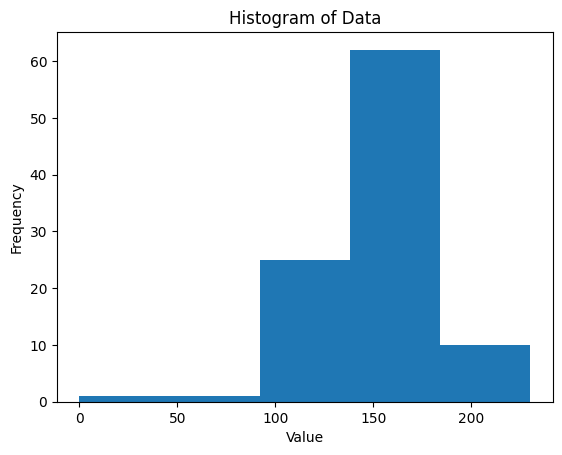

In [5]:
with open('/Users/apple/Downloads/Tcell_healthy_frag_0.05.txt', 'r') as f:
    lines = f.readlines()    # read all lines from the file

vector = []    # initialize an empty list for the vector

for line in lines:
    cols = line.split()    # split the line into columns
    vector.append(float(cols[3]))    # add the fourth column to the vector as a float

print(vector)

import matplotlib.pyplot as plt


# create histogram
plt.hist(vector, bins=5)

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# display the histogram
plt.show()
